# Simulação princípio de Hardy-Weinberg


## 1 - Importanto os pacotes necessários

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2 - Embasamento teórico

Para uma população evoluir, não basta apenas existir variação genética na população, também é necessário a atuação de outros fatores. O princípio de Hardy-Weinberg nos ajuda a testar se uma população está evoluindo.

### População:
Definindo **população** como um grupo de indivíduos da mesma espécie que vive na mesma área e cruza, produzindo descendentes férteis.

### Delimitação do problema:
Vamos analisar um específico *locus* dos indivíduos que possuirá dois alelos **A**(dominante) e **a**(recessivo). Logo podemos ter indivíduos:

* 1 - Homozigoto dominante - AA
* 2 - Heterozigoto - Aa
* 3 - Homozigoto recessivo - aa

Vamos definir algumas variáveis:

* a = Número de indivíduos AA (1)
* b = Número de indivíduos Aa (2)
* c = Número de indivíduos aa (3)
  
  
* t = Número total de alelos = 2(a + b + c)
* p = Proporção de alelos **A** = (2a + b)/t
* q = Proporção de alelos **a** = 1 - p = (2c + b)/t

### Princípio de Hardy-Weinberg
Esse princípio nos diz que em uma população que não está evoluindo, as proporções de alelos e genótipos permanecem constantes de geração para geração. Essa população estaria em equilíbrio de Hardy-Weinberg.

Quando está nesse equilíbrio, as proporções de cada genótipo devem ser aproximadamente as seguintes:
* AA - p<sup>2</sup>
* Aa - 2pq
* aa - q<sup>2</sup>

Logo, se uma população não segue essas proporções ela não está em equilíbrio de Hardy-Weinberg.

#### Condições para o equilíbrio de Hardy-Weinberg
A população descrita pelo princípio de Hardy-Weinberg é hipotética. Em casos reais, a proporção de alelos e genótipos normalmente muda. Isso pode acontecer quando um dos princípios a seguir é quebrado.

1. Ausência de Mutação
2. Cruzamento ao Acaso
3. Ausência de Seleção Natural
4. Tamanho populacional muito grande
5. Ausência de Fluxo Gênico

## 3 - Simulação
Vamos agora simular uma população com indivíduos de diferentes genótipos que irão se reproduzir. Analisaremos a proporção de cada genótipo ao longo das gerações. Vamos assumir algumas hipóteses simplificadoras:

* Os indivíduos de uma geração só poderão se reproduzir entre eles e apenas os descendentes destes formarão a próxima geração.
* O tamanho de cada geração será fixo
* Não há distinção entre macho e fêmea. Qualquer dupla de indivíduos têm o potencial reprodutivo

Vamos abordar casos diferentes e simular cada um.

### 3.1 - Caso 1: Todas as condições para o equilíbrio de Hardy-Weinberg são satisfeitas
Vamos portanto pegar uma população grande que se cruzará ao acaso e não haverá mutação, seleção natural ou fluxo gênico.

In [7]:
a = 1200
b = 1000
c = 2000

t = 2*(a + b + c)

p = (2*a + b)/t

q = (2*c + b)/t


In [9]:
caso1 = pd.DataFrame([1]*a+[2]*b + [3]*c, index=range(1, (a+b+c)+1), columns=[1])
caso1.index.name = "Id"
caso1.columns.name = "Geração"

In [11]:
caso1.T

Id,1,2,3,4,5,6,7,8,9,10,...,4191,4192,4193,4194,4195,4196,4197,4198,4199,4200
Geração,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3


Pode-se observar uma população com 4200 indivíduos: 1200 AA, 1000 Aa e 2000 aa

Vamos criar agora uma função que fará indivíduos de uma geração reproduzir e gerar descendentes, vamos fazer de forma que o tamanho da população permaneça o mesmo. Só os descendentes do cruzamento comporão a próxima geração.

A função **mate** gerará um descendente com genótipo de acordo com o quadro de Punnett

A função **offspring** reproduzirá os indivíduos de uma geração obtendo a próxima. A reprodução ocorre escolhendo vários casais aleatoriamente e passando pela função **mate**

In [12]:
def mate(casal):
    if casal == [1,2]:
        poss = [1, 1, 2, 2]
    elif casal == [1,3]:
        poss = [2, 2, 2, 2]
    elif casal == [2, 3]:
        poss = [2, 2, 3, 3]
    elif casal == [1,1]:
        poss = [1, 1, 1, 1]
    elif casal == [2,2]:
        poss = [1, 2, 2, 3]
    elif casal == [3,3]:
        poss = [3, 3, 3, 3]
    
    return int(np.random.choice(poss))
        

In [13]:
def offspring(pop, n_ger):
    #Última geração
    ult = pop.iloc[:, -1].copy()
    #Número da geração
    n = int(ult.name)
    if n == n_ger:
        return pop
    
    nova_gen = [mate(sorted(np.random.choice(ult, size=2, replace=False))) 
                for i in range(ult.shape[0])]
    pop[str(n+1)] = nova_gen
    return offspring(pop, n_ger)
    
    

In [14]:
caso1 = offspring(caso1.copy(), 20)

In [15]:
def freq(ser):
    return [100*list(ser).count(1)/len(ser), 100*list(ser).count(2)/len(ser), 
            100*list(ser).count(3)/len(ser)]

In [20]:
freq_caso1 = caso1.apply(freq, axis=0)
freq_caso1.index = ["AA","Aa","aa"]

In [21]:
freq_caso1.applymap(lambda x: "{:.2f}".format(x))

Geração,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
AA,28.57,16.36,17.05,17.76,17.43,18.26,18.02,18.55,16.67,17.24,17.05,16.64,16.71,17.02,16.55,16.90,15.90,16.02,15.67,16.48
Aa,23.81,48.71,49.07,46.76,48.36,48.64,47.64,46.81,49.88,47.79,48.14,47.55,47.74,47.33,48.55,47.98,48.12,47.40,47.60,47.90
aa,47.62,34.93,33.88,35.48,34.21,33.10,34.33,34.64,33.45,34.98,34.81,35.81,35.55,35.64,34.90,35.12,35.98,36.57,36.74,35.62


Podemos observar a proporção de cada genótipo ao longo das gerações, as proporções parecem estáveis. Vamos investigar isso mais a fundo com um gráfico.

In [22]:
df_caso1 = freq_caso1.T.reset_index().melt(id_vars=["Geração"], value_vars=["AA","Aa","aa"], var_name="Genótipo",
                            value_name="Proporção")

<AxesSubplot:xlabel='Geração', ylabel='Proporção'>

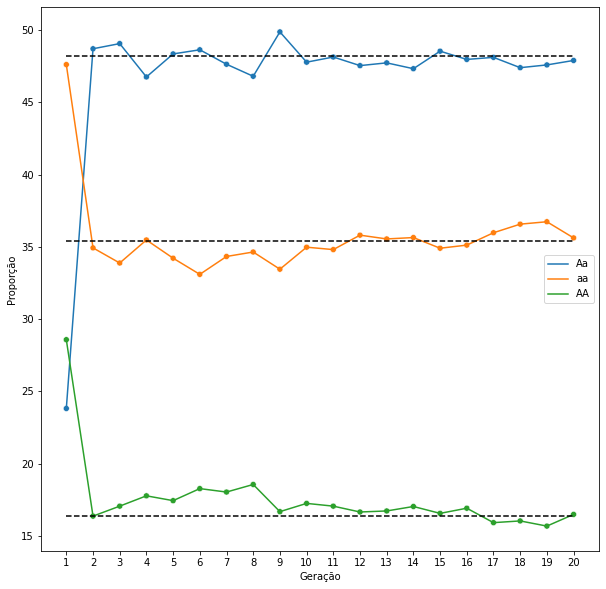

In [38]:
fig = plt.figure(figsize=(10,10))
axe = fig.add_subplot(1,1,1)

sns.scatterplot(x="Geração", y="Proporção", hue="Genótipo", data=df_caso1, ax=axe, legend=False,
               hue_order=["Aa","aa","AA"])
sns.lineplot(x="Geração", y="Proporção", hue="Genótipo", data=df_caso1, ax=axe, legend=True,
            hue_order=["Aa","aa","AA"])
axe.set_xticks(range(1,21))

sns.lineplot(x=range(1,21),y=(p**2)*100, ax=axe, color="black", linestyle="dashed")
sns.lineplot(x=range(1,21),y=(q**2)*100, ax=axe, color="black", linestyle="dashed")
sns.lineplot(x=range(1,21), y=(2*p*q)*100, ax=axe, color="black", linestyle="dashed")
